In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [49]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = "plotly_white"

**LOADING THE DATASET**

In [4]:
df = pd.read_excel("Superstore.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2021-152156,2021-11-08,2021-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2021-152156,2021-11-08,2021-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2021-138688,2021-06-12,2021-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2020-108966,2020-10-11,2020-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2020-108966,2020-10-11,2020-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2019-110422,2019-01-21,2019-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2022-121258,2022-02-26,2022-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2022-121258,2022-02-26,2022-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2022-121258,2022-02-26,2022-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2022-119914,2022-05-04,2022-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683.0,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [9]:
df.shape

(9994, 21)

In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [11]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2021-04-30 05:17:08.056834304,2021-05-04 04:17:20.304182528,55245.233297,229.858001,3.789574,0.156203,28.656896
min,1.000000,2019-01-03 00:00:00,2019-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2020-05-23 00:00:00,2020-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2021-06-26 00:00:00,2021-06-29 00:00:00,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2022-05-14 00:00:00,2022-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2022-12-30 00:00:00,2023-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32038.715955,623.245101,2.225110,0.206452,234.260108


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [13]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country/Region,0
City,0


In [14]:
df.describe().round()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.0,9994,9994,9983.0,9994.0,9994.0,9994.0,9994.0
mean,4998.0,2021-04-30 05:17:08.056834304,2021-05-04 04:17:20.304182528,55245.0,230.0,4.0,0.0,29.0
min,1.0,2019-01-03 00:00:00,2019-01-07 00:00:00,1040.0,0.0,1.0,0.0,-6600.0
25%,2499.0,2020-05-23 00:00:00,2020-05-27 00:00:00,23223.0,17.0,2.0,0.0,2.0
50%,4998.0,2021-06-26 00:00:00,2021-06-29 00:00:00,57103.0,54.0,3.0,0.0,9.0
75%,7496.0,2022-05-14 00:00:00,2022-05-18 00:00:00,90008.0,210.0,5.0,0.0,29.0
max,9994.0,2022-12-30 00:00:00,2023-01-05 00:00:00,99301.0,22638.0,14.0,1.0,8400.0
std,2885.0,NaN,NaN,32039.0,623.0,2.0,0.0,234.0


# **Explorartory Data Analysis**
1.What is the overall Sales0 Trend?

In [15]:
df['month_year'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

In [16]:
print(df['month_year'].unique())
print(df['month_year'].dtype)

['2021-11' '2021-06' '2020-10' '2019-06' '2022-04' '2021-12' '2020-11'
 '2019-11' '2019-05' '2019-08' '2022-07' '2020-09' '2021-01' '2022-10'
 '2020-12' '2022-09' '2021-07' '2021-03' '2019-10' '2020-04' '2019-12'
 '2021-09' '2022-12' '2022-11' '2022-05' '2021-04' '2020-01' '2022-06'
 '2021-08' '2020-03' '2019-09' '2022-02' '2021-10' '2020-05' '2019-03'
 '2021-05' '2020-02' '2020-08' '2020-07' '2019-07' '2020-06' '2019-04'
 '2022-03' '2022-08' '2022-01' '2019-02' '2019-01' '2021-02']
object


In [17]:
df_temp = df.groupby('month_year')['Sales'].sum().reset_index()

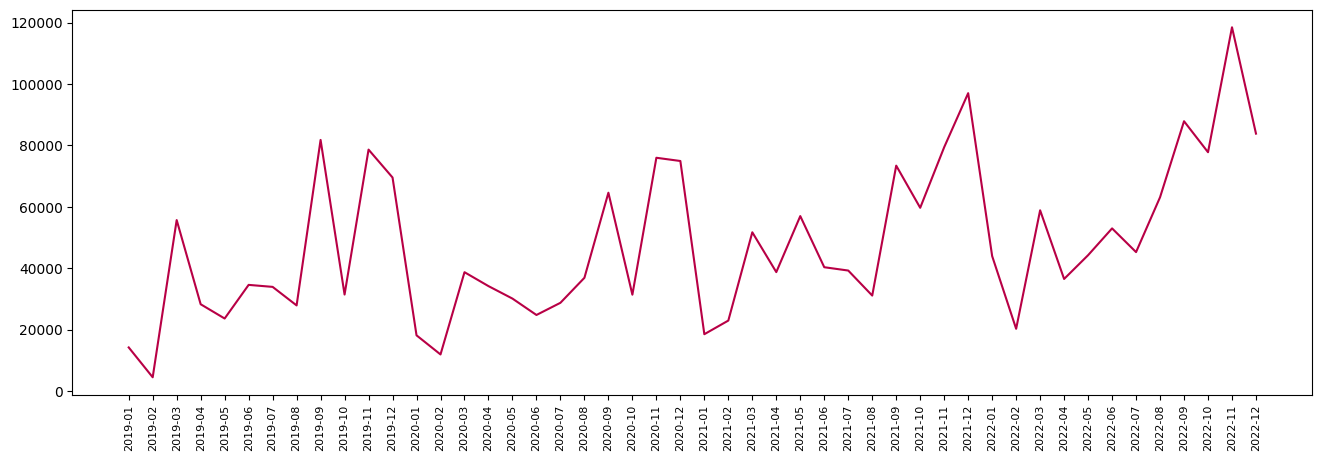

In [18]:
plt.figure(figsize=(16, 5))
plt.plot(df_temp['month_year'], df_temp['Sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

In [19]:
# SALES BY CATEGORY

In [20]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'month_year'],
      dtype='object')

In [21]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
fig = px.pie(sales_by_category,
values='Sales',
names='Category',
hole=0.5,
color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category',
title_font=dict(size=24))
fig.show()

In [22]:
#SALES BY SUBCATEGORY

In [23]:
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().reset_index()

fig2 = px.bar(sales_by_subcategory,
x='Sub-Category',
y='Sales',
color='Sub-Category',
color_discrete_sequence=px.colors.qualitative.Pastel,
title='Sales Analysis by Sub-Category')
fig2.show()

In [24]:
#Monthly Profits

In [25]:
profit_by_month = df.groupby('month_year')['Profit'].sum().reset_index()

fig3 = px.line(profit_by_month,
x='month_year',
y='Profit',
title='Monthly Profits')
fig3.show()

In [26]:
#Profit by category

In [27]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

fig4 = px.pie(profit_by_category,
values='Profit',
names='Category',
hole=0.5,
color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Profit Analysis by Category',
title_font=dict(size=24))

In [28]:
#Profit by Subcategory

profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index()

fig4 = px.pie(profit_by_subcategory,
values='Profit',
names='Sub-Category',
hole=0.5,
color_discrete_sequence=px.colors.qualitative.Pastel)

fig4.update_traces(textposition='inside', textinfo='percent+label')
fig4.update_layout(title_text='Profit Analysis by Sub-Category',
title_font=dict(size=24))


In [29]:
# PROFIT ANALYSIS BY CUSTOMER SEGMENTS
sales_pro_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

color_palette = colors.qualitative.Pastel
fig5 = go.Figure()
fig5.add_trace(go.Bar(x=sales_pro_by_segment['Segment'], y=sales_pro_by_segment['Sales'], name='Sales', marker_color=color_palette[0]))

fig5.add_trace(go.Bar(x=sales_pro_by_segment['Segment'], y=sales_pro_by_segment['Profit'], name='Profit', marker_color=color_palette[1]))

fig5.update_layout(title='Profit Analysis by Customer Segments', xaxis_title='Segment', yaxis_title='Amount', barmode='group')
fig5.show()

In [32]:
# Sales to Profit Ratio

sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']


print(sales_profit_by_segment[['Segment', 'Sales_Profit_Ratio']])

       Segment  Sales_Profit_Ratio
0     Consumer            8.659471
1    Corporate            7.677245
2  Home Office            7.125416


The store has higher profits from the product sales to consumers.

In [33]:
#WHICH ARE THE TOP 10 PRODUCTS BY SALES?

In [35]:
product_sales = pd.DataFrame(df.groupby('Product Name')['Sales'].sum())

product_sales.sort_values(by='Sales', ascending=False, inplace=True)
product_sales[:10]

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


Canon imageCLASS 2200 Advanced Copier is the top product by sale.

In [36]:
#WHICH ARE THE MOST SELLING PRODUCTS?

In [37]:
best_selling_products = pd.DataFrame(df.groupby('Product Name')['Quantity'].sum())

best_selling_products.sort_values(by='Quantity', ascending=False, inplace=True)
best_selling_products[:10]

,Quantity
Product Name,
Staples,215
Staple envelope,170
Easy-staple paper,150
Staples in misc. colors,86
KI Adjustable-Height Table,74
Avery Non-Stick Binders,71
Storex Dura Pro Binders,71
GBC Premium Transparent Covers with Diagonal Lined Pattern,67
"Situations Contoured Folding Chairs, 4/Set",64


Staples is the best selling product.

#What is the most preferred ship mode?


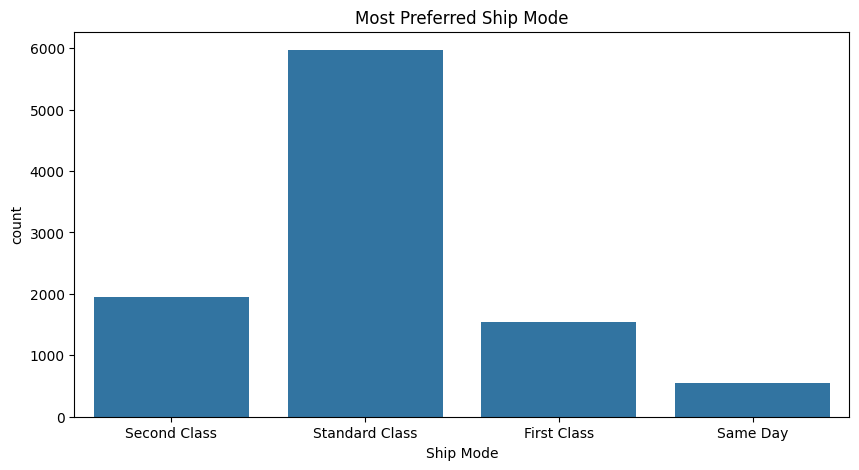

In [38]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Ship Mode', data=df)
plt.title('Most Preferred Ship Mode')
plt.show()

Standard class is the most preferred ship mode

In [5]:
#Which are the most profitable category and sub-category?

cat_subcat = pd.DataFrame(df.groupby(['Category','Sub-Category'])['Profit'].sum())
cat_subcat.sort_values(['Category','Profit'], ascending=False)

Profit
Category        Sub-Category            
Technology      Copiers       55617.8249
                Phones        44515.7306
                Accessories   41936.6357
                Machines       3384.7569
Office Supplies Paper         34053.5693
                Binders       30221.7633
                Storage       21278.8264
                Appliances    18138.0054
                Envelopes      6964.1767
                Art            6527.7870
                Labels         5546.2540
                Fasteners       949.5182
                Supplies      -1189.0995
Furniture       Chairs        26590.1663
                Furnishings   13059.1436
                Bookcases     -3472.5560
                Tables       -17725.4811

Technology and copiers

**Case Study 2: To analyze and answer business questions about 12 months
worth of sales data.**

The data contains hundreds of thousands of electronics store purchases broken down by month,
product type, cost, purchase address, etc.

In [25]:
try:
  all_data = pd.read_csv("all_data_copy.csv")
  print("File successfully loaded.")
except Exception as e:
  print("An error occurred while reading the CSV file:", e)

File successfully loaded.


In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [30]:
# drop rows of NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [31]:
all_data = all_data.dropna()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [32]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [33]:
# Make columns correct type
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83151 entries, 0 to 83559
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          83151 non-null  object
 1   Product           83151 non-null  object
 2   Quantity Ordered  83151 non-null  object
 3   Price Each        83151 non-null  object
 4   Order Date        83151 non-null  object
 5   Purchase Address  83151 non-null  object
dtypes: object(6)
memory usage: 4.4+ MB


In [34]:
all_data.shape

(83151, 6)

In [35]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,83151,83151,83151,83151,83151,83151
unique,79813,19,9,23,63805,71466
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"197 Center St, San Francisco, CA 94016"
freq,5,9796,75345,9796,8,6


In [36]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [37]:
# Add month Column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [38]:
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

<ipython-input-38-9ae23976486e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [39]:
# add city column

def city_iden(address):
  return address.split(",")[1].strip(" ")

def state_iden(address):
  return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{city_iden(x)} ({state_iden(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [40]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [41]:
monthly_sales = all_data.groupby('Month').agg({'Quantity Ordered': 'sum','Price Each':'sum','Sales':'sum'})

In [42]:
monthly_sales.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,18,3203.66,3207.50
4,20539,3362503.59,3385499.82
5,29,10555.45,10559.29


In [47]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'City', 'Sales'],
      dtype='object')

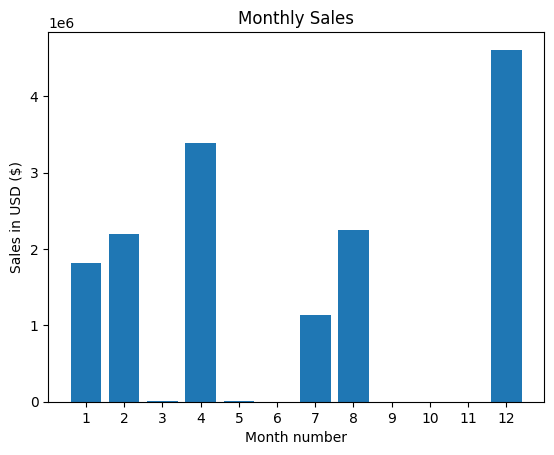

In [51]:
months = range(1,13)
# Get monthly sales data
monthly_sales = all_data.groupby(['Month'])['Sales'].sum()
# Create a list to store sales for all months
sales_data = [monthly_sales.get(month, 0) for month in months]
plt.bar(months ,sales_data)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.title('Monthly Sales')
plt.show()

In [52]:
# Month 12 (December) is the highest sales in 2019 with approximately $4,810,000.

# Question 2: What city sold the most product?
city_sales = all_data.groupby('City').agg({'Quantity Ordered': 'sum', 'Price Each': 'sum', 'Sales': 'sum'})
city_sales.head()


,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),7381,1221495.29,1227327.62
Austin (TX),4971,786523.68,790716.30
Boston (MA),9991,1643663.29,1653748.25
Dallas (TX),7457,1224471.57,1231213.60
Los Angeles (CA),14806,2374056.94,2388953.88


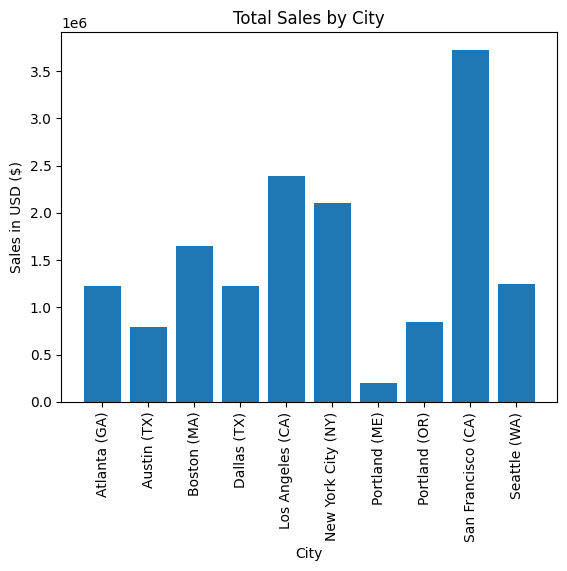

In [53]:
# Calculate monthly sales
city_sales = all_data.groupby('City')['Sales'].sum()
# Plotting
plt.bar(city_sales.index, city_sales.values)
plt.xticks(rotation=90)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.title('Total Sales by City')
plt.show()

In [ ]:
# San Francisco has highest sales.

# Question 3: What time should we display advertisements to maximize likelihood of customer’s
# buying product?

In [54]:
#Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

<ipython-input-54-7f9ed789aba0>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
<ipython-input-54-7f9ed789aba0>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


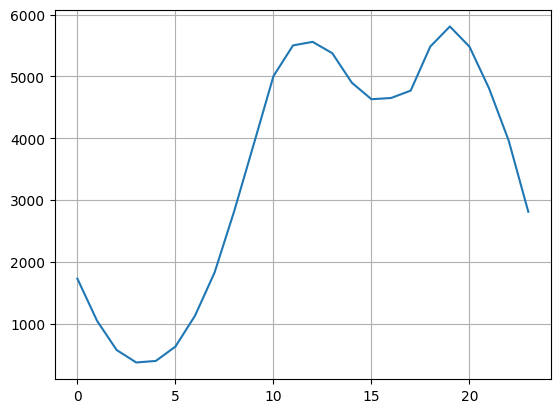

In [55]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]
plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.grid()
plt.show()

In [ ]:
# There are approximately 2 peaks at the data. They are 12 (12 PM) and 19 (7 PM). It makes sense
# since most people shop during the day. From this data, It can suggest to advertise their product
# right before 12 PM and/or 7 PM. It could be 11.30 AM and/or 6.30 PM.

# Question 4: What products are most often sold together?

In [56]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [58]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-58-91e38189159a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [60]:
from itertools import combinations
from collections import Counter
count = Counter()

for row in df2['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
  print(key, value)

('Google Phone', 'USB-C Charging Cable') 454
('iPhone', 'Lightning Charging Cable') 418
('iPhone', 'Wired Headphones') 208
('Google Phone', 'Wired Headphones') 200
('iPhone', 'Apple Airpods Headphones') 167
('Vareebadd Phone', 'USB-C Charging Cable') 164
('Google Phone', 'Bose SoundSport Headphones') 92
('USB-C Charging Cable', 'Wired Headphones') 84
('Vareebadd Phone', 'Wired Headphones') 71
('USB-C Charging Cable', 'Bose SoundSport Headphones') 35


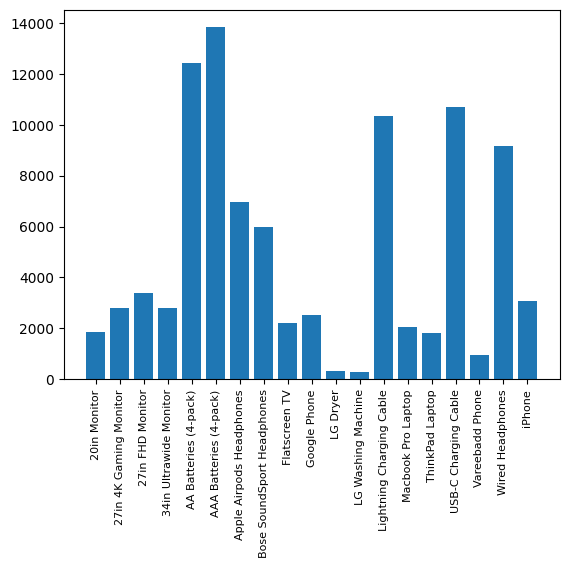

In [61]:
# The most often products sold together are Google Phone and USB-C Charging Cable with 454
# transactions.
# Question 5: What product sold the most?

product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [62]:
# AAA batteries sold the most.

Case Study 3 : Create a report for an upcoming board meeting. Go through and analyze the sales data from
2015-2017 in order to generate the requested report. The report should capture the following:

• Revenue by region
• Revenue by sales Rep
• Revenue by products
• Sales trend
• Yearly changes in revenue

In [63]:
df = pd.read_csv('sales-data.csv')

In [64]:
df.head()

,Date,SalesRep,Region,Product,Color,Units,Revenue
0,2015-11-06,Julie,East,Sunshine,Blue,4,78.8
1,2015-11-07,Adam,West,Bellen,Clear,4,123.0
2,2015-11-07,Julie,East,Aspen,Clear,1,26.0
3,2015-11-07,Nabil,South,Quad,Clear,2,69.0
4,2015-11-07,Julie,South,Aspen,Blue,2,51.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      9971 non-null   object 
 1   SalesRep  9971 non-null   object 
 2   Region    9971 non-null   object 
 3   Product   9971 non-null   object 
 4   Color     9971 non-null   object 
 5   Units     9971 non-null   int64  
 6   Revenue   9971 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 545.4+ KB


In [66]:
df.describe()

,Units,Revenue
count,9971.000000,9971.000000
mean,3.388828,91.181513
std,4.320759,120.894473
min,1.000000,21.000000
25%,2.000000,42.900000
50%,2.000000,60.000000
75%,3.000000,76.500000
max,25.000000,1901.750000


In [ ]:
# There was a total of 9,971 sales entries between 2015-2017 Units:
# • The minimum number of units sold between 2015-2017 was 1
# • The maximum number of units sold between 2015-2017 was 25
# • The average number of units sold between 2015-2017 was aproximately 3
# Revenue:
# • The least revenue generated between 2015-2017 was 21
# • The most revenue between 2015-2017 was approximately 1902

In [67]:
df.isna().sum()

,0
Date,0
SalesRep,0
Region,0
Product,0
Color,0
Units,0
Revenue,0


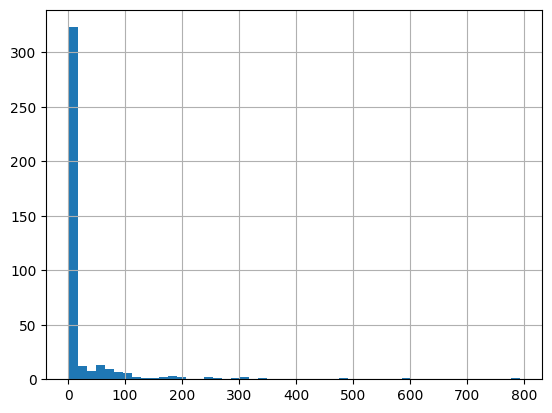

In [68]:
#Revenue Analysis
df['Revenue'].value_counts().hist(bins=50);

In [69]:
# Most items were sold between 21 - 70.



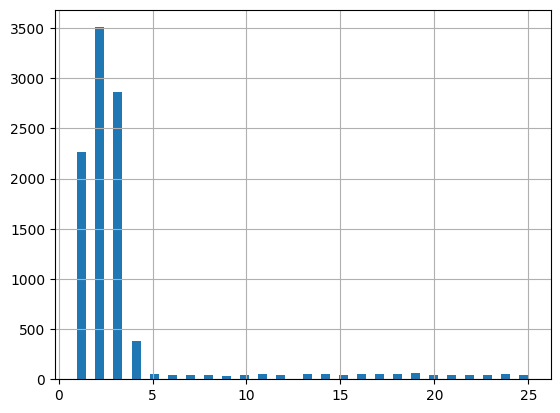

In [70]:
# 2. Units Analysis
df['Units'].hist(bins=50);

In [71]:
# 3. What’s the total revenue generated between 2015-2017?
round(df['Revenue'].sum())

909171

In [72]:
# 4. Revenue by Region
region_revenue = pd.DataFrame(df.groupby(by=['Region'])['Revenue'].sum())
region_revenue.sort_values(ascending=False, by='Revenue')

,Revenue
Region,
West,408037.58
South,263256.50
East,237876.79


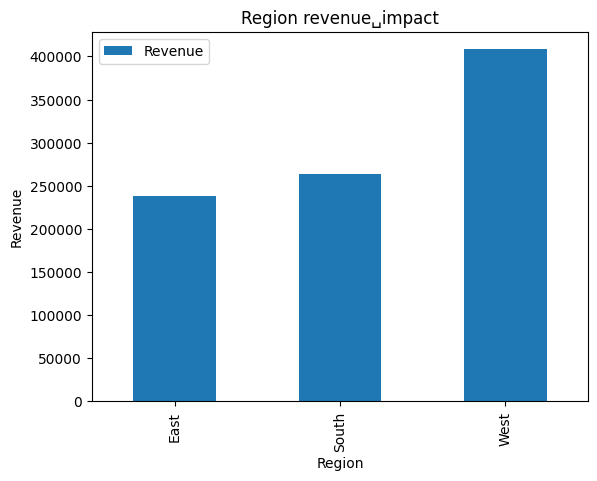

In [73]:
region_revenue.plot(kind='bar', ylabel='Revenue', title='Region revenue␣impact');

In [ ]:
# • West Region generated the most revenue

In [75]:
# 5. Revenue by sales Rep
sales_rep_revenue = df.groupby(by=['SalesRep'])['Revenue'].sum()
sales_rep_revenue = pd.DataFrame(sales_rep_revenue).sort_values(ascending=True,by='Revenue')
sales_rep_revenue

,Revenue
SalesRep,
Nicole,92026.68
Adam,102715.60
Jessica,145496.28
Nabil,158904.48
Julie,204450.05
Mike,205577.78


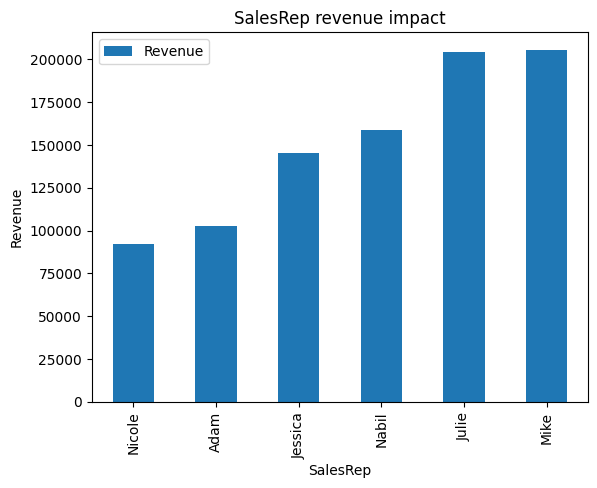

In [76]:
sales_rep_revenue.plot(kind='bar', ylabel='Revenue', title='SalesRep revenue impact');

In [77]:
# • Mike Slightly beat Julie in revenue generation

In [78]:
product_revenue = df[['Units', 'Revenue','Product']].groupby('Product').sum().sort_values(ascending=False,by='Units')
product_revenue

,Units,Revenue
Product,,
Bellen,6579,168175.05
Quad,6223,194032.15
Sunbell,4500,114283.09
Carlota,4371,101272.05
Aspen,4242,96382.80
Sunshine,4229,85983.80
Doublers,3646,149041.93


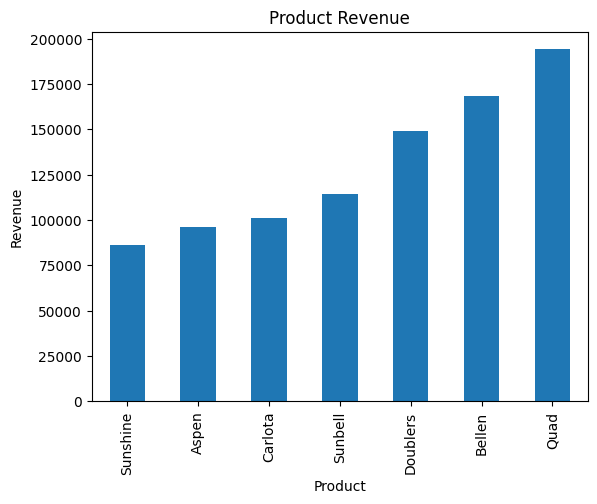

In [79]:
product_revenue.groupby(by=['Product'])['Revenue'].sum().sort_values(ascending=True).plot(
kind='bar',ylabel='Revenue',title='Product Revenue');

In [ ]:
# • Quad has highest Revenue.

In [80]:
# 7. Sales Trend
# Convert the date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [81]:
# Plot Yearly Sales Trend
years = [unique for unique in df.Year.unique()]
years

[np.int32(2015), np.int32(2016), np.int32(2017)]

In [82]:
def plot_trend(years:list, df):
  for year in years:
    new_df = df[df['Year'] == year]
    new_df.groupby('Date')['Revenue'].sum().plot(linewidth=1.2,
                                                 ylabel='Revenue',
                                                 xlabel='Date',
                                                 title='Sales Trend');

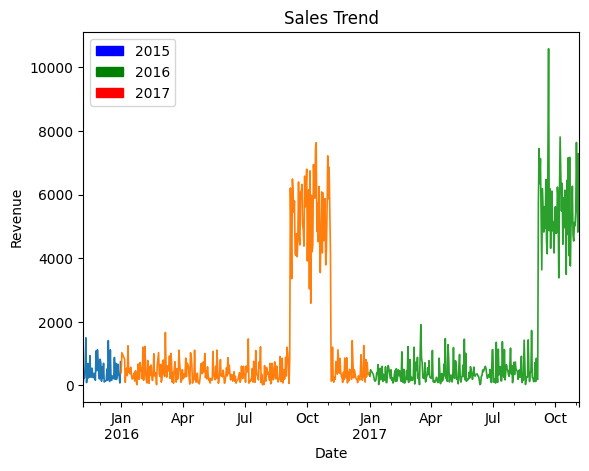

In [83]:
import matplotlib.patches as patches
year1 = patches.Patch(color='blue', label='2015')
year2 = patches.Patch(color='green', label='2016')
year3 = patches.Patch(color='red', label='2017')
plot_trend(years, df)
plt.legend(handles=[year1,year2,year3], loc=2);

In [ ]:
# The trend plot looks symmetrical for the months of October in 2017 and 2018 respectively.

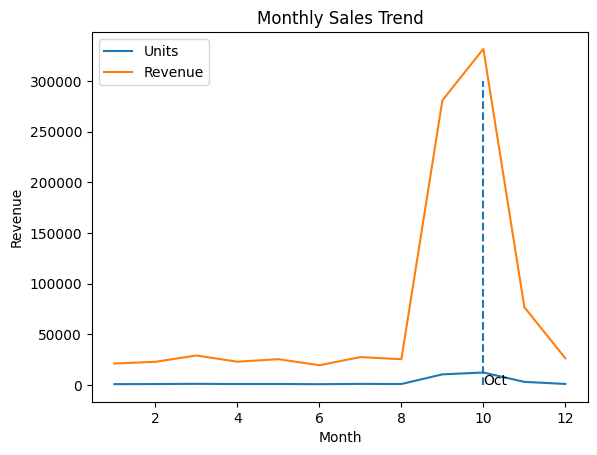

In [84]:
# Monthly Sales Trend
ax = df[['Month', 'Units', 'Revenue']].groupby('Month').sum().plot(
    title='Monthly Sales Trend',
    ylabel='Revenue');
ax.vlines(10,1,300000, linestyles='dashed')
ax.annotate('Oct',(10,0));

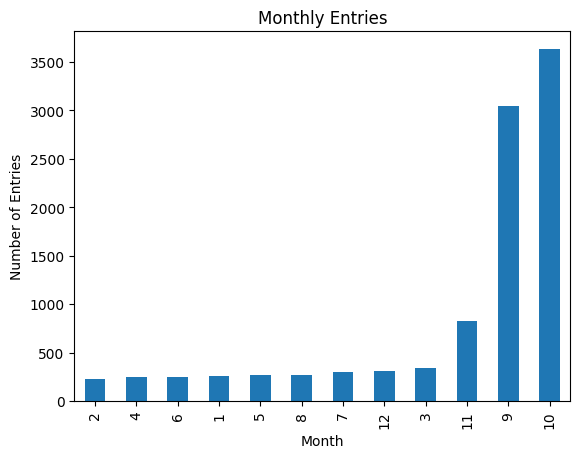

In [86]:
# 8. How many times was entry made in each month?
df['Month'].value_counts().sort_values().plot(kind='bar', xlabel='Month',ylabel='Number of Entries', title='Monthly Entries');


In [ ]:
# • Highest Entry in October.

In [87]:
# 9. Monthly Sales
products = pd.DataFrame(df[['Units','Revenue','Product','Month', 'Region']].groupby('Month')['Product'].value_counts())
products

count
Month Product        
1     Bellen       52
      Quad         46
      Sunbell      34
      Aspen        33
      Sunshine     33
...               ...
12    Sunbell      43
      Aspen        41
      Sunshine     36
      Carlota      35
      Doublers     32

[84 rows x 1 columns]

In [88]:
products['No_of_products'] = products['count']
products = products.reset_index()

In [89]:
products.drop('count', inplace=True, axis=1)
products

,Month,Product,No_of_products
0,1,Bellen,52
1,1,Quad,46
2,1,Sunbell,34
3,1,Aspen,33
4,1,Sunshine,33
...,...,...,...
79,12,Sunbell,43
80,12,Aspen,41
81,12,Sunshine,36
82,12,Carlota,35


In [90]:
products = products.pivot_table(values=['No_of_products'], index=['Month'],columns=['Product'], aggfunc= np.sum)
products

<ipython-input-90-3689df5734f2>:1: FutureWarning: The provided callable <function sum at 0x7f694f908ea0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  products = products.pivot_table(values=['No_of_products'], index=['Month'],columns=['Product'], aggfunc= np.sum)


No_of_products                                              
Product          Aspen Bellen Carlota Doublers Quad Sunbell Sunshine
Month                                                               
1                   33     52      30       29   46      34       33
2                   26     45      29       25   45      35       26
3                   49     55      46       34   77      35       39
4                   31     37      35       27   50      43       25
5                   33     52      36       30   51      37       31
6                   37     53      23       21   52      30       36
7                   38     60      37       25   55      46       42
8                   34     54      26       35   51      35       35
9                  380    596     399      311  560     397      404
10                 476    735     439      333  697     491      460
11                 119    154     118       77  142     108      103
12                  41     55      35       32   64      43       36

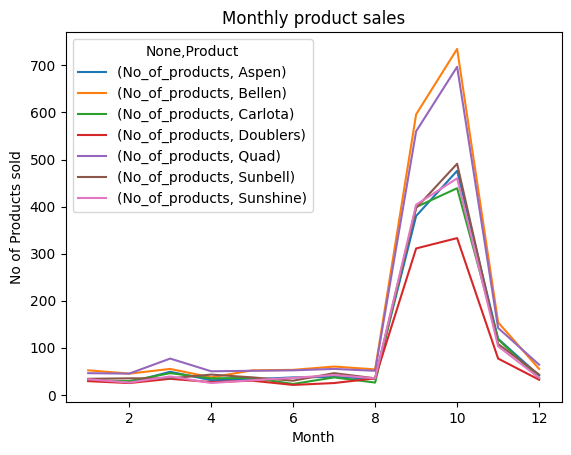

In [91]:
products.plot(ylabel='No of Products sold', title='Monthly product sales');

In [92]:
# 10. Region Monthly Revenue
region_sales = pd.DataFrame(df[['Units','Revenue','Product','Month','Region']]).groupby(['Month','Region'])['Revenue'].sum()
region_sales = pd.DataFrame(region_sales)
region_sales

Revenue
Month Region           
1     East      5012.34
      South     7551.55
      West      8550.33
2     East      6428.75
      South     5540.10
      West     10864.87
3     East      6082.75
      South     8863.80
      West     14087.99
4     East      6420.63
      South     7647.28
      West      8865.57
5     East      8782.68
      South     5651.30
      West     10962.00
6     East      6442.85
      South     3954.90
      West      9020.65
7     East      7180.45
      South    10155.59
      West     10150.25
8     East      6031.55
      South     7767.60
      West     11567.37
9     East     70532.44
      South    83228.39
      West    127160.06
10    East     87858.60
      South    92034.70
      West    151780.43
11    East     19478.10
      South    24048.59
      West     33196.52
12    East      7625.65
      South     6812.70
      West     11831.54

In [93]:
region_sales = region_sales.reset_index()
region_sales = region_sales.pivot_table(values=['Revenue'], index=['Month'],columns=['Region'], aggfunc= np.sum)
region_sales

<ipython-input-93-de6f2e7eb62f>:2: FutureWarning: The provided callable <function sum at 0x7f694f908ea0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  region_sales = region_sales.pivot_table(values=['Revenue'], index=['Month'],columns=['Region'], aggfunc= np.sum)


Revenue                     
Region      East     South       West
Month                                
1        5012.34   7551.55    8550.33
2        6428.75   5540.10   10864.87
3        6082.75   8863.80   14087.99
4        6420.63   7647.28    8865.57
5        8782.68   5651.30   10962.00
6        6442.85   3954.90    9020.65
7        7180.45  10155.59   10150.25
8        6031.55   7767.60   11567.37
9       70532.44  83228.39  127160.06
10      87858.60  92034.70  151780.43
11      19478.10  24048.59   33196.52
12       7625.65   6812.70   11831.54

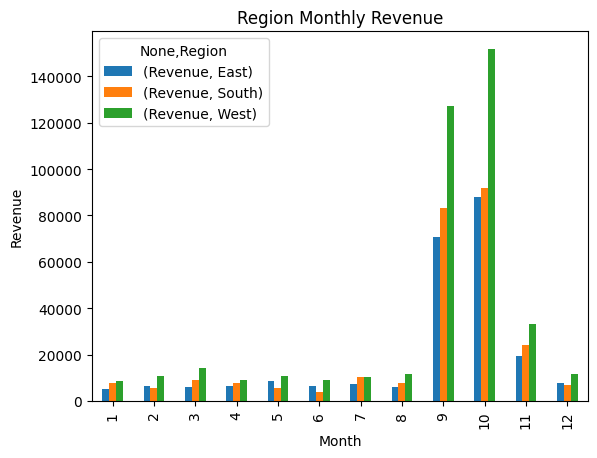

In [94]:
region_sales.plot(kind='bar', ylabel='Revenue', title='Region Monthly Revenue');

In [95]:
changes = pd.DataFrame(df.groupby([df.Date.dt.year])['Revenue'].sum())
changes

,Revenue
Date,
2015,24883.84
2016,444701.72
2017,439585.31


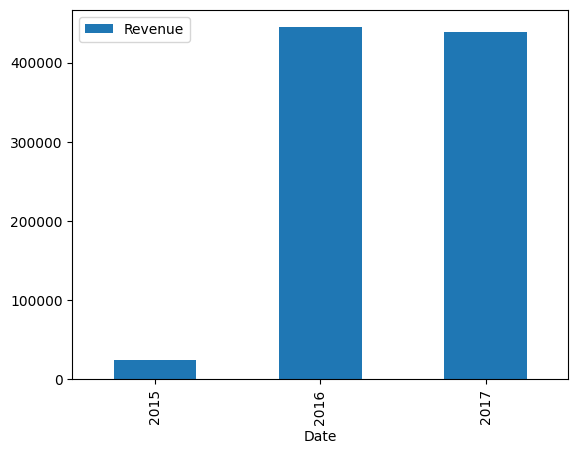

In [96]:
changes.sort_values('Date').plot(kind='bar');

In [97]:
product_revenue

,Units,Revenue
Product,,
Bellen,6579,168175.05
Quad,6223,194032.15
Sunbell,4500,114283.09
Carlota,4371,101272.05
Aspen,4242,96382.80
Sunshine,4229,85983.80
Doublers,3646,149041.93


In [ ]:
# Bellen, Quad and Sunbell

In [99]:
# 13. The most productive sales Rep in the respective years.
salesReps = df[['SalesRep','Year','Revenue','Units']]
salesReps = pd.DataFrame(salesReps.groupby(['Year','SalesRep'])['Revenue'].sum())
salesReps.sort_values(by=['Year','Revenue'], ascending=False)

Revenue
Year SalesRep           
2017 Julie      99727.32
     Mike       96062.19
     Nabil      81079.23
     Jessica    69479.74
     Adam       49712.19
     Nicole     43524.64
2016 Mike      104590.64
     Julie      98895.58
     Nabil      74576.22
     Jessica    71469.42
     Adam       49184.21
     Nicole     45985.65
2015 Julie       5827.15
     Mike        4924.95
     Jessica     4547.12
     Adam        3819.20
     Nabil       3249.03
     Nicole      2516.39

In [100]:
# Recommendation:
# • The best months for sales are September, October and November.
# • The company should look into creating jingles during these periods to further maximize profit.
# • Focus the ad targeted audience on East and South Regions.
# • Bellen and Quad sell most during these periods consider getting more of them.